Required libraries installation
!pip install scikit-learn matplotlib

1. Import libraries

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

NUM_SAMPLE = 1000000

1. Load the saved model
We assume the model was previously saved using pickle.
Here we load the trained model from the file 'linear_regression_model.pkl'

In [304]:
with open(f'saved_models/linear_regression_model_{NUM_SAMPLE}.pkl', 'rb') as file:
    model = pickle.load(file)

2. Generate data
X represents hours of study, and y represents exam scores
Randomly generate some data with a linear relationship

In [305]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # Hours of study
y = 4 + 3 * X + np.random.randn(100, 1) # Exam scores (4 + 3 * hours of study + noise)

3. Split data into training and test sets (80% train, 20% test)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Make predictions using the loaded model
We use the previously trained and loaded model to predict on the test set.

In [307]:
y_pred = model.predict(X_test)

5. Evaluation using Mean Squared Error (MSE)
MSE measures the average of the squared differences between actual and predicted values.
- Lower MSE means the model's predictions are closer to the true values.
- If MSE is high, the model is not predicting well, and we may need to improve it.

In [308]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.6718640366739475


6. Evaluation using Mean Absolute Error (MAE)
MAE calculates the average of the absolute differences between actual and predicted values.
- Lower MAE means the model is performing better, as it shows smaller errors on average.
- High MAE indicates larger prediction errors and suggests the model may need improvement.

In [309]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.6286183819400121


7. Evaluation using R² (R-squared)
R² explains how well the independent variable(s) explain the variance in the dependent variable.
- R² = 1 means the model perfectly explains the data.
- R² closer to 0 means the model is not explaining much of the variance, and the model may need improvement.

In [310]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8018487442438923


8. Cross-validation for more reliable evaluation
Cross-validation splits the data into multiple subsets and evaluates the model on each subset.
- This gives us a more reliable performance estimate.
- If cross-validation scores vary significantly across folds, the model may not generalize well.

In [311]:
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
print("Mean Cross-Validation MSE:", -scores.mean())
print("Cross-Validation Standard Deviation:", scores.std())


Mean Cross-Validation MSE: 0.8534764258097833
Cross-Validation Standard Deviation: 0.15816959812665563


9. Learning curve
A learning curve helps visualize the model's performance as the training set size increases.
- If training error is high and validation error is high, the model may be underfitting (too simple).
- If training error is low but validation error is high, the model may be overfitting (too complex for the data).

In [312]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')

Plot learning curve

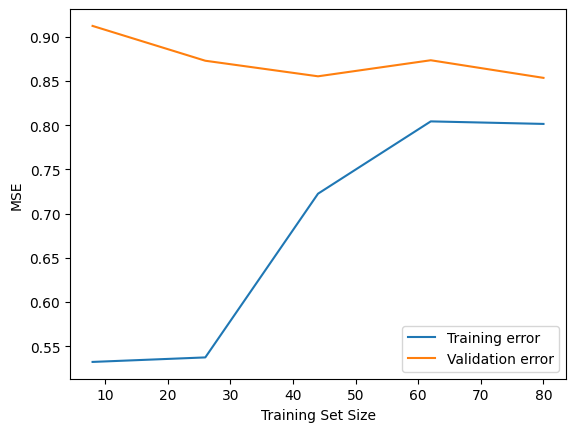

<Figure size 640x480 with 0 Axes>

In [313]:
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.legend()
plt.show()

plt.savefig(f'output/{NUM_SAMPLE}.png')

In [314]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create the output directory if it doesn't exist
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Path for the CSV file
csv_path = os.path.join(output_dir, "result.csv")

# Check if the CSV file already exists
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    # Create an empty DataFrame with the desired columns
    df = pd.DataFrame(columns=[
        "Num_Sample", 
        "Mean Squared Error", 
        "Mean Absolute Error", 
        "R² Score", 
        "Mean Cross-Validation MSE", 
        "Cross-Validation Standard Deviation", 
        "Training Error", 
        "Validation Error"
    ])

# Generate data based on the NUM_SAMPLE
np.random.seed(42)
X = 2 * np.random.rand(NUM_SAMPLE, 1)  # Hours of study
y = 4 + 3 * X + np.random.randn(NUM_SAMPLE, 1)  # Exam scores (4 + 3 * hours of study + noise)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluations
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
mean_cv_mse = -scores.mean()
cv_std = scores.std()

# Calculate Training and Validation Error
training_error = mean_squared_error(y_train, model.predict(X_train))
validation_error = mse

# Check if the Num_Sample already exists in the CSV
if NUM_SAMPLE in df["Num_Sample"].values:
    # Update the existing row
    df.loc[df["Num_Sample"] == NUM_SAMPLE, [
        "Mean Squared Error", 
        "Mean Absolute Error", 
        "R² Score", 
        "Mean Cross-Validation MSE", 
        "Cross-Validation Standard Deviation", 
        "Training Error", 
        "Validation Error"
    ]] = [mse, mae, r2, mean_cv_mse, cv_std, training_error, validation_error]
else:
    # Add a new row
    df = pd.concat([df, pd.DataFrame([{
        "Num_Sample": NUM_SAMPLE,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R² Score": r2,
        "Mean Cross-Validation MSE": mean_cv_mse,
        "Cross-Validation Standard Deviation": cv_std,
        "Training Error": training_error,
        "Validation Error": validation_error
    }])], ignore_index=True)

# Save the DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print(f"Results for NUM_SAMPLE={NUM_SAMPLE} have been saved/updated in {csv_path}.")

Results for NUM_SAMPLE=1000000 have been saved/updated in output/result.csv.


Num_Sample	Mean Squared Error	Mean Absolute Error	R² Score	Mean Cross-Validation MSE	Cross-Validation Standard Deviation	Training Error	Validation Error
10	        0.301836906	        0.548904677	        0.909523437	0.502700122	                0.483327653	                        0.428654872	    0.301836906
100	        0.653699514	        0.591342578	        0.807205964	0.853476426	                0.158169598	                        0.847678856	    0.653699514
1000	    0.857372467	        0.720479109	        0.77332878	0.979691462	                0.06035933	                        1.004442156	    0.857372467
10000	    0.967921885	        0.778415938	        0.74816371	1.000076879	                0.027886189	                        1.007206605	    0.967921885
100000	    1.004359825	        0.798949494	        0.750558435	0.996527349	                0.006431469	                        0.994554281	    1.004359825
1000000	    1.001591415	        0.798344577	        0.749151481	1.002202849	                0.002663683	                        1.002348926	    1.001591415